### ST445 Managing and Visualizing Data
# Working with APIs
### Working with Twitter API


## Twitter API

### The twitter API can be a powerful tool for your research. Because:

1. Free
2. Easy to access
3. Vast amount of data 
    - e.g. more than 20M brexit tweets, especially more than 5M tweets are generated on 23rd June, 2016
    


## Requirement to use Twitter API

1. Twitter account (of course it's free)
2. Programming environment (python or R)
3. Stable internet connection (if you stream tweets)
4. Database solution (DB? flat text?)

## Open twitter accounts

- It's recommended to have a separate account for twitter scraping
- You can open a twitter account using a free email account (e.g. Gmail)
    https://twitter.com/signup

![signup_twitter](figs/twitter_signup.png)



## Create an Twitter app

- You can get the API access keys and tokens by registering a web-app for Twitter
- Go to the apps page
    https://apps.twitter.com/
- Create New App

![signup_twitter](figs/apps_register.png)



## Get keys and tokens

- Go to "Keys and Access Tokens" page of the app you've just register
- Generate tokens
- Get 4 pieces of information and store them securely
    - Consumer Key, Consumer Secret, Access Token, Access Token Secret
    - Make sure that everything is copied precisely (nothing left out, no additional space)

![signup_twitter](figs/keys_tokens.png)



## Twitter APIs 

#### There are many methods, but followings are the ones you are likely to use

- Streaming
- User_timeline
- Users-lookup 
- Followers and friends (e.g. network analysis)


## API (1): Streaming
- Documentation: [Streaming API](https://developer.twitter.com/en/docs/tweets/filter-realtime/api-reference/post-statuses-filter.html)
- Filter and stream up to 1% of tweets
- Based on:
    - twitter accounts (< 5000 ids)
    - keywords (< 400 words)
- Most frequently used for research purpose
    - Because it will give you huge amount of free data


## API (2): User Timeline
- Documentation: [User_timeline](https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline.html)
- Returns a collection of the most recent Tweets by a user (up to 3200 tweets)
- Based on:
    - user_id or screen_name


## API (3): Users Lookup
- Documentation: [Users_lookup](https://developer.twitter.com/en/docs/accounts-and-users/follow-search-get-users/api-reference/get-users-lookup)
    - Returns fully-hydrated user objects for up to 100 users per request, as specified by comma-separated values passed to the user_id and/or screen_name parameters.
    - This method is especially useful when used in conjunction with collections of user IDs of followers and friends.
- Based on:
    - user_id or screen_name


## Understanding the rate-limit of APIs

- There are limits in the number of api-calls or amount of the data you can get in a time period
- Examples:
    - Users Lookup (100 users in one call, 1500 users in 15 min)
    - Get followers (5000 users per call, 15 calls in 15 min)
- This looks like a lot, but what if you want to get all followers of 100 very popular accounts... (Katy Perry and Justin Bieber > 100M followers)
    - This means for a large scale analysis you need to set up a program that works very long time without breaking down
   
  



## Packages

### Python
- tweepy (esp for streaming)
- python-twitter
- twython

### R

- twitteR
- streamR (for streaming) 


## Working Twitter API from R

### Authentication


In [1]:
require(twitteR)
source("tw_credential.R")
# the contents of the credential file is like:
# api_key <- "***"
# api_secret <- "***"
# access_token <- "***"
# access_token_secret <- "***"

# authorize the Twitter access
setup_twitter_oauth(api_key, api_secret, access_token, access_token_secret)


Loading required package: twitteR


[1] "Using direct authentication"


## Accessing Uesr-timeline 

### Get latest tweets from "@POTUS"

In [2]:
## downloading 3,200 most recent tweets from the President of United States
tw <- userTimeline("POTUS", n = 3200, includeRts = TRUE)
twDf <- twListToDF(tw)


In [3]:
library(stringi)
twDf$text <- stri_trans_general(twDf$text, "latin-ascii") ## convert everything into ascii
twDf[1:10, ] 
# obviously there are a lot of retweets of "@realDonaldTrump"

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
#OneAmericaAppeal #USA���� https://t.co/BmbwA8XtGo,FALSE,9375,NA,2017-10-22 00:20:05,FALSE,NA,921893887962206208,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,2475,FALSE,FALSE,NA,NA
"RT @realDonaldTrump: ""Trump hails liberation of Raqqa as critical breakthrough in anti-ISIS campaign"" https://t.co/2eoYXJB7h0",FALSE,0,NA,2017-10-21 16:54:42,FALSE,NA,921781805296111616,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,10422,TRUE,FALSE,NA,NA
"RT @realDonaldTrump: Subject to the receipt of further information, I will be allowing, as President, the long blocked and classified JFK F...",FALSE,0,NA,2017-10-21 15:01:52,FALSE,NA,921753406141796352,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,69262,TRUE,FALSE,NA,NA
RT @FLOTUS: Honored today to donate my inaugural couture piece to the @amhistorymuseum! https://t.co/ENU1BeJA02,FALSE,0,NA,2017-10-21 00:17:28,FALSE,NA,921530841452437504,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,5901,TRUE,FALSE,NA,NA
"RT @fema: Protect yourself against scams after disasters like #CAWildfires &amp; #Maria. If you suspect you're a victim of fraud, call: 800-323...",FALSE,0,NA,2017-10-21 00:16:37,FALSE,NA,921530628704817152,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,995,TRUE,FALSE,NA,NA
"RT @VP: By lowering the business tax rate under @POTUS' tax reform plan, American companies will be more competitive on the world stage. ht...",FALSE,0,NA,2017-10-21 00:14:11,FALSE,NA,921530016185442305,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,2724,TRUE,FALSE,NA,NA
RT @SecShulkin: .@POTUS @realDonaldTrump and I remain focused on providing the best possible care to our nations #Veterans https://t.co/Alr...,FALSE,0,NA,2017-10-21 00:14:09,FALSE,NA,921530004906938368,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,1188,TRUE,FALSE,NA,NA
"RT @Scavino45: Today, @POTUS @realDonaldTrump joined @MariaBartiromo for an interview. Airing Sun @FoxNews @SundayFutures 10amE. ��https://t...",FALSE,0,NA,2017-10-21 00:14:07,FALSE,NA,921529999689240581,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,1178,TRUE,FALSE,NA,NA
RT @realDonaldTrump: This is a once-in-a-generation opportunity to offer historic tax relief to the American people! Join me today: https:/...,FALSE,0,NA,2017-10-20 21:13:58,FALSE,NA,921484660181557249,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,15415,TRUE,FALSE,NA,NA
"RT @realDonaldTrump: Today, it was an honor to have @UN Secretary-General @AntonioGuterres at the @WhiteHouse. Speaking for the U.S.A., we...",FALSE,0,NA,2017-10-20 19:26:47,FALSE,NA,921457687606517760,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,6877,TRUE,FALSE,NA,NA


### Some simple data exploration

- how many retweets? 
- who was retweeted?

In [4]:
library(dplyr)
library(stringr)
table(twDf$isRetweet)
texts <- twDf %>% filter(isRetweet == T) %>% select(text) %>% unlist

str_replace(texts, "\\n", " ") %>% 
   str_replace("^RT\\s*(@[[:alnum:]]+).+", "\\1") %>% 
   table %>% sort(decreasing = T) %>% head(10)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:twitteR’:

    id, location

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




FALSE  TRUE 
  403  1017 

.
@realDonaldTrump              @VP      @WhiteHouse       @Scavino45 
             381              131               86               69 
         @FLOTUS     @IvankaTrump        @PressSec      @SecShulkin 
              40               30               22               11 
 @SecretaryPerry          @USNavy 
               9                8 

### Some simple data exploration

- which month?


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



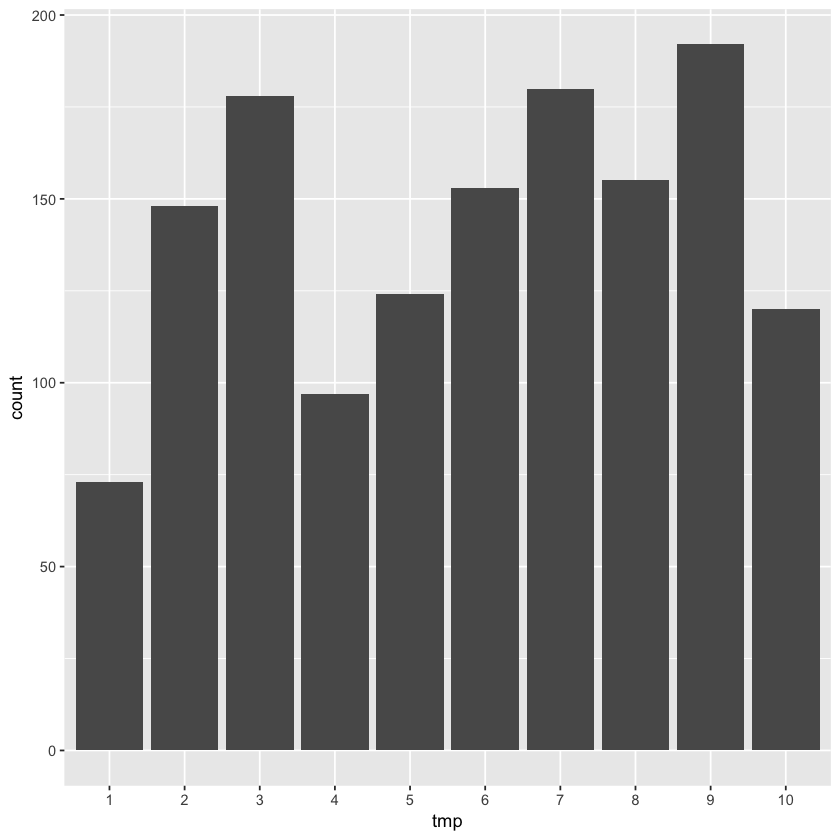

In [5]:
library(lubridate)
library(ggplot2)

tmp <- twDf$created %>% month() %>% factor
qplot(tmp, geom = 'bar')


### Some simple data exploration

- time of the day?


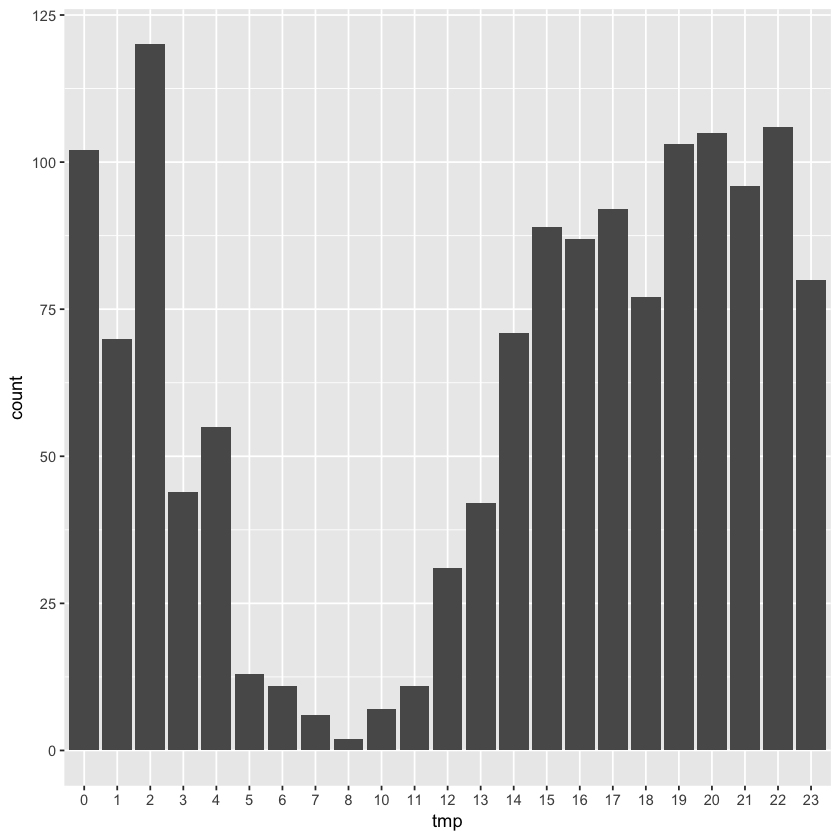

In [6]:
library(lubridate)
library(ggplot2)

tmp <- twDf$created %>% hour() %>% factor
qplot(tmp, geom = 'bar')


## Get some user infomation using lookupUsers()

1. extract screen_names from retweeted accounts (30 most retweeted)
2. get the information of these accounts

In [7]:
rt_user_screen_names <- str_replace(texts, "\\n", " ") %>% 
   str_replace("^RT\\s*@([[:alnum:]]+).+", "\\1") %>% 
   table %>% sort(decreasing = T) %>% head(30) %>% names
rt_user_screen_names
## FoxNews and foxandfriends are there...

[1] "realDonaldTrump" "VP"              "WhiteHouse"      "Scavino45"      
 [5] "FLOTUS"          "IvankaTrump"     "PressSec"        "SecShulkin"     
 [9] "SecretaryPerry"  "USNavy"          "GOPLeader"       "GorsuchFacts"   
[13] "FoxNews"         "netanyahu"       "SBALinda"        "SecPriceMD"     
[17] "SecondLady"      "SHSanders45"     "StateDept"       "CENTCOM"        
[21] "foxandfriends"   "marcorubio"      "SenateMajLdr"    "TRUCKINGdotORG" 
[25] "fema"            "FLGovScott"      "NASA"            "ricardorossello"
[29] "SecretaryAcosta" "TomBossert45"

## Get some user infomation using lookupUsers()

1. extract screen_names from retweeted accounts (30 most retweeted)
2. get the information of these accounts

In [8]:
library(stringi)
rt_user_information <- 
   lookupUsers(rt_user_screen_names) %>% twListToDF
rt_user_information <- rt_user_information %>% 
   mutate(description = stri_trans_general(description, "latin-ascii"))


## Check data

- Who has most followers?

In [9]:
rt_user_information %>% select(c("screenName", "followersCount")) %>%
  arrange(desc(followersCount))


screenName,followersCount
realDonaldTrump,40996784
NASA,26712586
FoxNews,16220441
WhiteHouse,15715928
FLOTUS,8736466
StateDept,4780381
IvankaTrump,4726903
VP,4720429
marcorubio,3151582
PressSec,2230210


## Check data

- Who has most tweets?

In [10]:
rt_user_information %>% select(c("screenName", "statusesCount")) %>%
  arrange(desc(statusesCount))


screenName,statusesCount
FoxNews,337630
foxandfriends,73905
StateDept,50373
NASA,49210
realDonaldTrump,36172
ricardorossello,34395
USNavy,23760
IvankaTrump,13646
fema,13555
CENTCOM,10088
